In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import json
from pandas.io.json import json_normalize

from datetime import datetime, timedelta
import datetime
logins = pd.read_json('logins.json')
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.sort_values(['login_time'], ascending=True, inplace=True)
print(logins.shape)

d1 = logins['login_time'].min()
d2 = logins['login_time'].max() + datetime.timedelta(minutes=5)
delta = datetime.timedelta(minutes=24*60)
times = []
while d1 < d2:
    times.append(d1)
    d1 += delta
times.append(d2)
# df = pd.DataFrame(times, columns = ['t1'])
# df['t2'] = df['t1'].shift(-1)
# df.dropna(inplace=True)
# df.tail(5)
logins.head()

(93142, 1)


,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [65]:
print(logins.login_time.min())
print(logins.login_time.max())

1970-01-01 20:12:16
1970-04-13 18:57:38


In [61]:
logins['time_buckets'] = pd.cut(logins['login_time'], bins=times, include_lowest= True)
logins['time_buckets'] = logins['time_buckets'].astype(str)
# logins[['t1','t2']] = logins['time_buckets'].str.split(pat=",", expand=True)
# logins.drop(['time_buckets'], inplace=True)
logins.head(5)

,login_time,time_buckets
6,1970-01-01 20:12:16,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:..."
0,1970-01-01 20:13:18,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:..."
1,1970-01-01 20:16:10,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:..."
3,1970-01-01 20:16:36,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:..."
2,1970-01-01 20:16:37,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:..."


In [62]:
df_plot = logins.groupby('time_buckets').size().reset_index()
df_plot.columns = ['time_buckets', 'count_logins']
df_plot.head(2)

,time_buckets,count_logins
0,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:...",594
1,"(1970-01-02 20:12:16, 1970-01-03 20:12:16]",821


In [63]:
df_plot.count_logins.shape

(102,)

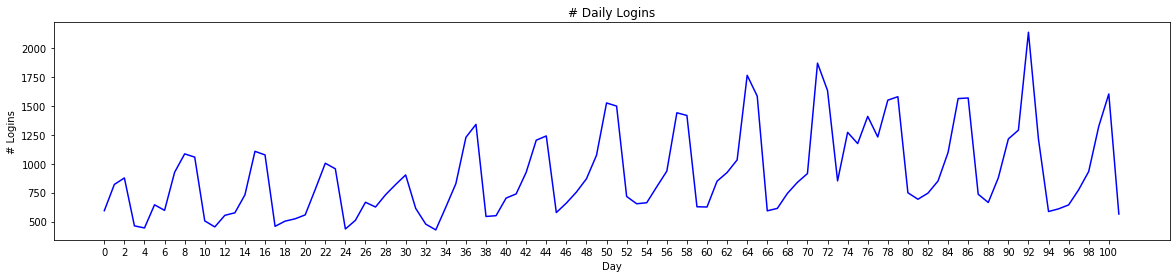

In [82]:
plt.figure(figsize=(20,4))
plt.plot(df_plot.index, df_plot.count_logins, color='Blue')
plt.xlabel('Day')
plt.ylabel('# Logins')
plt.title('# Daily Logins')
plt.xticks(np.arange(min(df_plot.index), max(df_plot.index), 2.0))
plt.show()

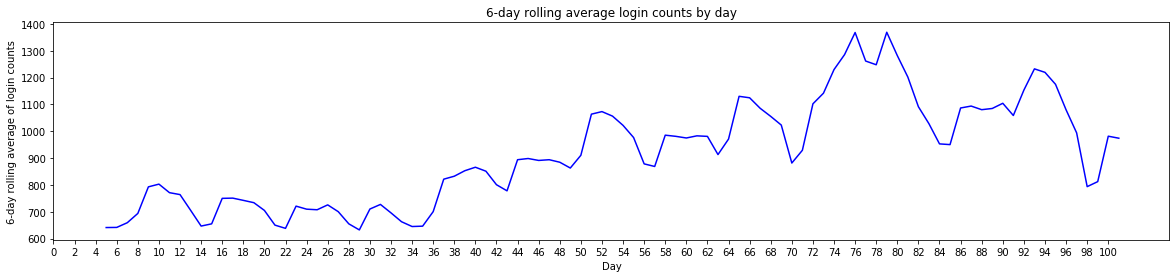

In [83]:
plt.figure(figsize=(20,4))
df_plot.count_logins.rolling(window = 6).mean().plot(color='Blue')
plt.xlabel('Day')
plt.ylabel('6-day rolling average of login counts')
plt.title('6-day rolling average login counts by day')
plt.xticks(np.arange(min(df_plot.index), max(df_plot.index), 2.0))
plt.show()

In [84]:
df_plot.head()

,time_buckets,count_logins
0,"(1970-01-01 20:12:15.999999999, 1970-01-02 20:...",594
1,"(1970-01-02 20:12:16, 1970-01-03 20:12:16]",821
2,"(1970-01-03 20:12:16, 1970-01-04 20:12:16]",877
3,"(1970-01-04 20:12:16, 1970-01-05 20:12:16]",463
4,"(1970-01-05 20:12:16, 1970-01-06 20:12:16]",445


In [6]:
# logins['key'] = 1
# df['key'] = 1
# logins = logins.merge(df, how = 'outer', on = 'key')
# logins.shape

In [39]:
import sqlite3
conn = sqlite3.connect(':memory:')

sqlcode = '''
select A.*,B.*
from logins
inner join df
on A.1=B.1
where A.login_time >= B.t1 and A.login_time <= B.t2
'''

# newdf = ps.sqldf(sqlcode,locals())

# Part 3 - Predictive Modeling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import json
from pandas.io.json import json_normalize

ultimate_data = pd.read_json('ultimate_data_challenge.json')
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['first_last_month_diff'] = (ultimate_data.last_trip_date - ultimate_data.signup_date).astype('timedelta64[M]')
print(ultimate_data.shape)
start_date = ultimate_data.last_trip_date.max() - timedelta(days = 30)
print(start_date)
ultimate_data['active_4th_mo'] = np.where(((ultimate_data['last_trip_date'] >= '2014-04-01') & (ultimate_data['last_trip_date'] <= '2014-04-30')),1, 0)
ultimate_data['active_5th_mo'] = np.where(((ultimate_data['last_trip_date'] >= '2014-05-01') & (ultimate_data['last_trip_date'] <= '2014-05-31')),1, 0)
ultimate_data['retained'] = np.where(((ultimate_data['last_trip_date'] >= start_date) & (ultimate_data['last_trip_date'] <= '2014-07-01')),1, 0)
ultimate_data.head()

(50000, 13)
2014-06-01 00:00:00


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,first_last_month_diff,active_4th_mo,active_5th_mo,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,4.0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,3.0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0,0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,5.0,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1.0,0,0,0


In [148]:
print(ultimate_data.last_trip_date.min())
print(ultimate_data.last_trip_date.max())

2014-01-01 00:00:00
2014-07-01 00:00:00


### A. Exloratory Data Analysis

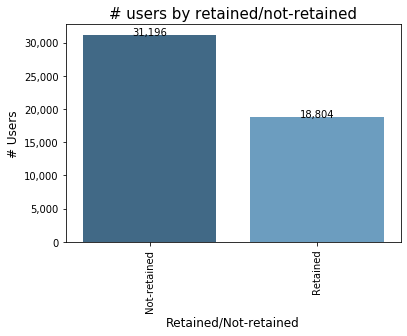

In [115]:
# 37.6% of the users were retained i.e. 37.6% of the users took a trip in the last 30 days preceding to '2014-07-01'
ultimate_data.ind_retained.sum()/len(ultimate_data)
df = ultimate_data['retained'].value_counts().reset_index()
df.columns = ['retained','count_users']
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'count_users', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('# Users', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("# users by retained/not-retained", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name, row.count_users, format(row.count_users,','), color='black', ha="center")
plt.show()

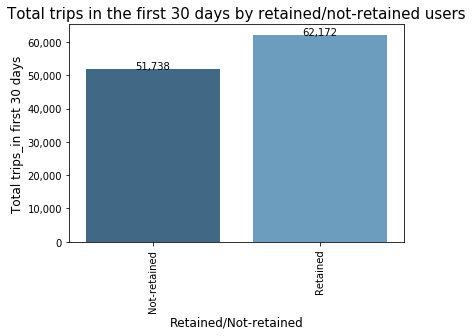

In [97]:
# Higher total number of trips in the first 30 days by retained users
df = ultimate_data.groupby('retained').agg({'trips_in_first_30_days':np.sum}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'trips_in_first_30_days', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Total trips_in first 30 days', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Total trips in the first 30 days by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name, row.trips_in_first_30_days, format(round(row.trips_in_first_30_days,0),','), color='black', ha="center")
plt.show()

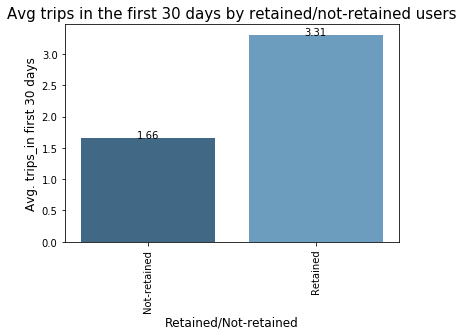

In [85]:
# Higher average number of trips in the first 30 days by retained users
df = ultimate_data.groupby('retained').agg({'trips_in_first_30_days':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'trips_in_first_30_days', data=df, palette="Blues_d")
plt.ylabel('Avg. trips_in first 30 days', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg trips in the first 30 days by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.trips_in_first_30_days, round(row.trips_in_first_30_days,2), color='black', ha="center")
plt.show()

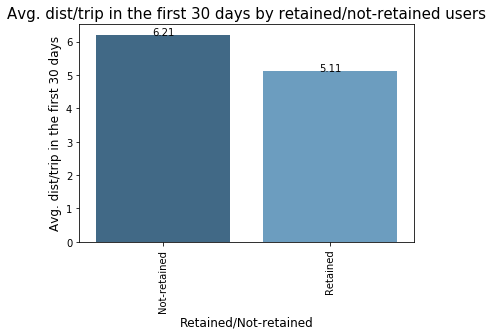

In [120]:
# Avg. dist/trip in the first 30 days is higher for users which were not retained
ultimate_data['tot_dist'] = ultimate_data['avg_dist']*ultimate_data['trips_in_first_30_days']
df = ultimate_data.groupby('retained').agg({'avg_dist':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'avg_dist', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. dist/trip in the first 30 days', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. dist/trip in the first 30 days by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.avg_dist, round(row.avg_dist,2), color='black', ha="center")
plt.show()

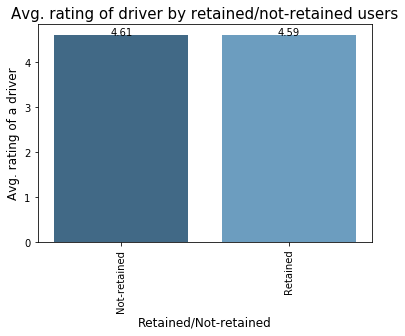

In [66]:
# Avg. rating of driver is slightly higher for users which were not retained
df = ultimate_data.groupby('retained').agg({'avg_rating_of_driver':np.mean}).reset_index()
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'avg_rating_of_driver', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. rating of a driver', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. rating of driver by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.avg_rating_of_driver, round(row.avg_rating_of_driver,2), color='black', ha="center")
plt.show()

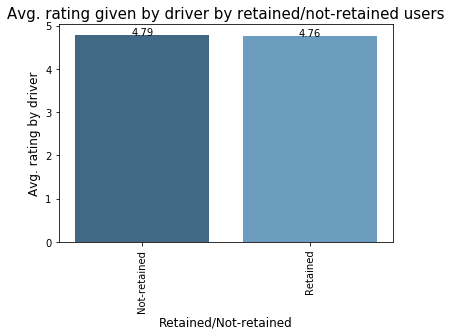

In [68]:
# Avg. rating by driver is slightly higher for users which were not retained
df = ultimate_data.groupby('retained').agg({'avg_rating_by_driver':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'avg_rating_by_driver', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. rating by driver', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. rating given by driver by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.avg_rating_by_driver, round(row.avg_rating_by_driver,2), color='black', ha="center")
plt.show()

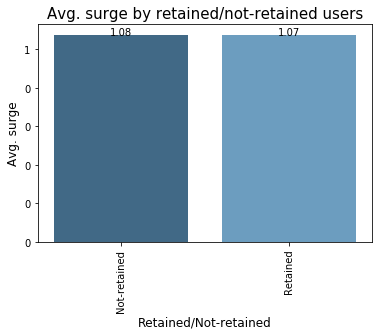

In [69]:
# Avg. surge multiplier is slightly higher for users which were not retained
df = ultimate_data.groupby('retained').agg({'avg_surge':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'avg_surge', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. surge', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. surge by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.avg_surge, round(row.avg_surge,2), color='black', ha="center")
plt.show()

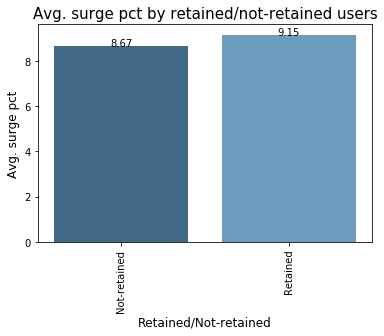

In [70]:
# The avg percent of trips taken with surge multiplier > 1 is higher for users which were retained
df = ultimate_data.groupby('retained').agg({'surge_pct':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'surge_pct', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. surge pct', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. surge pct by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.surge_pct, round(row.surge_pct,2), color='black', ha="center")
plt.show()

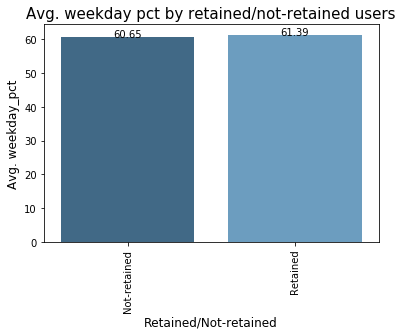

In [74]:
# The avg. percent of the user’s trips occurring during a weekday is higher for users which were retained
df = ultimate_data.groupby('retained').agg({'weekday_pct':np.mean}).reset_index()
import matplotlib
plt.figure(figsize=(6,4))
ax = sns.barplot(x="retained", y = 'weekday_pct', data=df, palette="Blues_d")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Avg. weekday_pct', fontsize=12)
plt.xlabel("Retained/Not-retained", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg. weekday pct by retained/not-retained users", fontsize=15)
for index, row in df.iterrows():
    ax.text(row.name,row.weekday_pct, round(row.weekday_pct,2), color='black', ha="center")
plt.show()

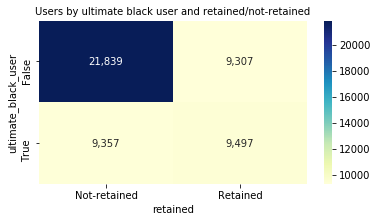

In [81]:
# 70% of users which were not retained didn't take Black Ultimate in their first 30 days
df = pd.crosstab(ultimate_data.ultimate_black_user, ultimate_data.retained)
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.heatmap(df,annot=True, fmt="d", cmap="YlGnBu")
ax.set_title("Users by ultimate black user and retained/not-retained", fontsize=10)
for t in ax.texts:
    t.set_text('{:,d}'.format(int(t.get_text())))
plt.show()

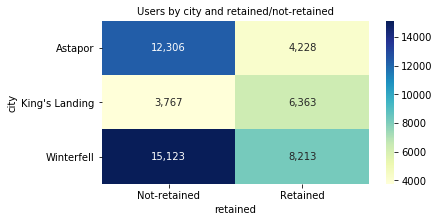

In [82]:
df = pd.crosstab(ultimate_data.city, ultimate_data.retained)
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.heatmap(df,annot=True, fmt="d", cmap="YlGnBu")
ax.set_title("Users by city and retained/not-retained", fontsize=10)
for t in ax.texts:
    t.set_text('{:,d}'.format(int(t.get_text())))
plt.show()

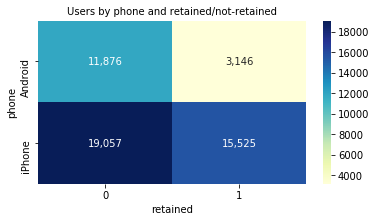

In [28]:
# 83% of the users who were retained used iPhone 
df = pd.crosstab(ultimate_data.phone, ultimate_data.retained)
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.heatmap(df,annot=True, fmt="d", cmap="YlGnBu")
ax.set_title("Users by phone and retained/not-retained", fontsize=10)
for t in ax.texts:
    t.set_text('{:,d}'.format(int(t.get_text())))
plt.show()

In [31]:
ultimate_data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'first_last_month_diff', 'active_4th_mo',
       'active_5th_mo', 'retained'],
      dtype='object')

In [117]:
ultimate_data.retained.value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [4]:
ultimate_data_1 = ultimate_data.copy()
categorical = ['city', 'phone', 'ultimate_black_user_1']
numeric = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
impute_values = {}
for col in numeric:
    try:
        impute_values[col] = ultimate_data_1[col].median()
    except:
         pass
for col in categorical:
    try:
        impute_values[col] = 'Missing'
    except:
        pass
ultimate_data_1 = ultimate_data_1.fillna(impute_values)
# print(ultimate_data_1.isnull().sum())

# 1. Logistic Regression

In [5]:
# dmatrices drops the msising values and hence here the records drop to ~41K from ~50K. 
# The phone column has all the missing values
# If we don't drop the missing values records and impute them with any keyword, it shows as a coefficient in logistic regression
from patsy import dmatrices
# + first_last_month_diff + C(active_4th_mo) + C(active_5th_mo)
y, X = dmatrices('retained ~ trips_in_first_30_days + avg_rating_of_driver + avg_surge + surge_pct + weekday_pct + avg_dist + avg_rating_by_driver + C(city) + C(phone) + C(ultimate_black_user)', ultimate_data, return_type = 'dataframe')
X.drop('Intercept', axis=1, inplace=True)
X.shape

(41445, 11)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train['retained'])/len(train), 2))
print(round(sum(test['retained'])/len(test), 2))

0.41
0.41


In [7]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

29011
29011
12434
12434


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
model=LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=2000)
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(model, param_grid=parameters, cv=5, scoring="roc_auc")
fitmodel.fit(X_train, y_train.values.ravel())
print(fitmodel.best_estimator_)
print(fitmodel.best_params_)
print(fitmodel.best_score_)

print(accuracy_score(fitmodel.predict(X_test), y_test.values.ravel()))

LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000)
{'C': 0.1}
0.7593392639048011
0.6961557021071256


In [142]:
coef = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(fitmodel.best_estimator_.coef_))], axis = 1)
col_names=["Parameter","Coef"]
coef.columns=col_names
coef

,Parameter,Coef
0,C(city)[T.King's Landing],1.662180
1,C(city)[T.Winterfell],0.507163
2,C(phone)[T.iPhone],1.071652
3,C(ultimate_black_user)[T.True],0.886172
4,trips_in_first_30_days,0.104975
5,avg_rating_of_driver,-0.057490
6,avg_surge,-0.156674
7,surge_pct,0.002818
8,weekday_pct,-0.000404
9,avg_dist,-0.035960


In [144]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, fitmodel.predict(X_test)))
print('\n')
print("=== All AUC Scores ===")
log_cv_score = cross_val_score(fitmodel, X, y.values.ravel(), cv = 5, scoring='roc_auc')
print(log_cv_score)

print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", log_cv_score.mean())

=== Confusion Matrix ===
[[5254 2069]
 [1646 3465]]


=== All AUC Scores ===
[0.76043701 0.75690739 0.75169158 0.76104273 0.76474129]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.7589640012664001


In [ ]:
# TN = 5254
# FN = 1646
# FP = 2069
# TP = 3465

# 2. XGBoost Classifier

In [11]:
ultimate_data['ultimate_black_user_1'] = np.where((ultimate_data['ultimate_black_user'] == True),'Ultimate_Black', 'No_ultimate_Black')
categorical = ['city', 'phone', 'ultimate_black_user_1']
numeric = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
X_cat = pd.get_dummies(ultimate_data[categorical])
X_cat.drop(['city_Astapor','phone_Android','ultimate_black_user_1_No_ultimate_Black'], axis=1, inplace=True)
X = pd.concat((X_cat, ultimate_data[numeric]), axis = 1) 
y = ultimate_data['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

35000
35000
15000
15000


In [150]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
xgb = XGBClassifier(objective = 'multi:softprob', num_class = 2)
hyper_params = {'n_estimators':[50,100], 'max_depth':[5,6], 'learning_rate': [0.01, 0.1, 0.3, 0.5], 'n_jobs':[10]} #, 'colsample_bynode': [1], }
fitmodel = GridSearchCV(xgb, param_grid=hyper_params, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
print(fitmodel.best_estimator_)
print(fitmodel.best_params_)
print(fitmodel.best_score_)
print(accuracy_score(fitmodel.predict(X_test), y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=10,
              nthread=None, num_class=2, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': 10}
0.792142857142857
0.7889333333333334


In [12]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0,
                    learning_rate=0.1, max_delta_step=0, max_depth=6, min_child_weight=1, missing=None, n_estimators=100, 
                    n_jobs=10, nthread=None, num_class=2, objective='multi:softprob', random_state=0, reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1,seed=None, silent=None, subsample=1, verbosity=1, scoring="accuracy")
xgb.fit(X_train, y_train)
print("Accuracy_score for train dataset", accuracy_score(xgb.predict(X_train), y_train))
print("Accuracy_score for test dataset", accuracy_score(xgb.predict(X_test), y_test))

Accuracy_score for train dataset 0.8156857142857142
Accuracy_score for test dataset 0.7889333333333334


In [157]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, fitmodel.predict(X_test)))
print('\n')
print("=== All AUC Scores ===")
log_cv_score = cross_val_score(fitmodel, X, y.values.ravel(), cv = 5, scoring='roc_auc')
print(log_cv_score)

print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Logistic Regression: ", log_cv_score.mean())

=== Confusion Matrix ===
[[8044 1335]
 [1831 3790]]


=== All AUC Scores ===
[0.8574972  0.8547078  0.85385793 0.8616467  0.8631592 ]


=== Mean AUC Score ===
Mean AUC Score - Logistic Regression:  0.8581737648991574


In [ ]:
# TN = 8044
# FN = 1831
# FP = 1335
# TP = 3790

In [15]:
def de_one_hot_encode(s):
    for col in categorical:
        if(col in s):
            return col
    return s

variables = X_train.columns.tolist()
features = pd.DataFrame({'Importance':xgb.feature_importances_ , 'Variable':variables})           
features['Variable'] = features['Variable'].apply(de_one_hot_encode)
features = features.groupby('Variable').sum().reset_index()
features = features.sort_values('Importance', ascending=False )
features = features[['Importance', 'Variable']]
display(features)
features.to_excel('feature_importances_xgb.xlsx')

,Importance,Variable
4,0.290091,city
1,0.205696,avg_rating_by_driver
5,0.143339,phone
6,0.107297,surge_pct
8,0.094967,ultimate_black_user_1
9,0.061105,weekday_pct
7,0.030555,trips_in_first_30_days
2,0.027348,avg_rating_of_driver
3,0.022708,avg_surge
0,0.016893,avg_dist
